In [1]:

def find_nearest_above(my_array, target):
    diff = my_array - target
    mask = np.ma.less_equal(diff, -1)
    # We need to mask the negative differences
    # since we are looking for values above
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c # returns min index of the nearest if target is greater than any value
    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()


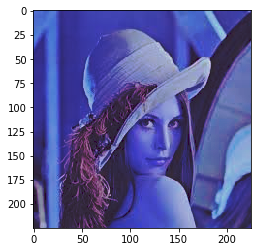

In [8]:
def hist_match(original, specified):
 
    oldshape = original.shape
    original = original.ravel()
    specified = specified.ravel()
 
    # get the set of unique pixel values and their corresponding indices and counts
    s_values, bin_idx, s_counts = np.unique(original, return_inverse=True,return_counts=True)
    t_values, t_counts = np.unique(specified, return_counts=True)
 
    # Calculate s_k for original image
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    
    # Calculate s_k for specified image
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]
 
    # Round the values
    sour = np.around(s_quantiles*255)
    temp = np.around(t_quantiles*255)
    
    # Map the rounded values
    b=[]
    for data in sour[:]:
        b.append(find_nearest_above(temp,data))
    b= np.array(b,dtype='uint8')
 
    return b[bin_idx].reshape(oldshape)
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load the images in greyscale
original = cv2.imread(r'C:\Users\Austin\Desktop\6th SEM\Digital IMage Processing\11.jpg')
specified = cv2.imread(r'C:\Users\Austin\Desktop\6th SEM\Digital IMage Processing\m.jpg')

# perform Histogram Matching
a = hist_match(original, specified)

# Display the image
# cv2.imshow('a',np.array(a,dtype='uint8'))
# cv2.imshow('a1',original)
# cv2.imshow('a2',specified)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(a)

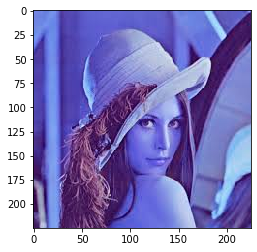

In [9]:

plt.imshow(original)
    

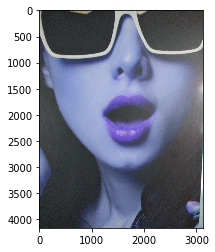

In [10]:
plt.imshow(specified)
